In [0]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [2]:
# Read The csv file
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [3]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-01,1.502857,1.560714,1.500000,1.550714,1.034021,90384000
1,2009-12-02,1.542857,1.564286,1.529286,1.538571,1.025924,51324000
2,2009-12-03,1.538571,1.560000,1.497143,1.502143,1.001633,47824000
3,2009-12-04,1.495714,1.512143,1.483571,1.510714,1.007349,44485000
4,2009-12-05,1.492857,1.510714,1.480714,1.489286,0.993060,46544400


In [4]:
training_data = df.iloc[:, 1:2].values
training_data.shape


(3853, 1)

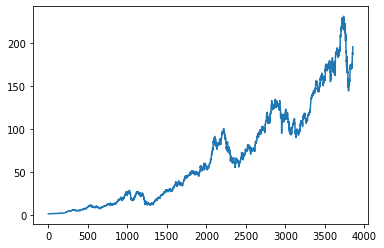

In [5]:
plt.plot(training_data)

In [6]:
# data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

scaled_training_data = scaler.fit_transform(training_data)
scaled_training_data.shape



(3853, 1)

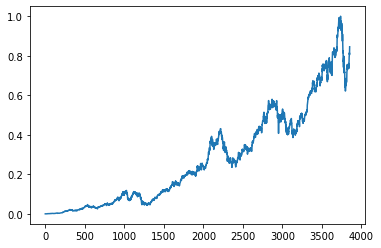

In [7]:
plt.plot(scaled_training_data)

Predict the opening stock price of the data based on the opening stock prices for the past 60 days.

In [8]:
# create the training feature set and the corresponding results
# use 3803 data for training, and the rest 50 for testing
training_feature = []
result = []
for i in range(60, 3803):
  training_feature.append(scaled_training_data[i-60:i,0])
  result.append(scaled_training_data[i,0])
training_feature = np.array(training_feature)
result = np.array(result)
print(training_feature.shape)
print(result.shape)

(3743, 60)
(3743,)


In [9]:
# reshape the training feature for LSTM
training_feature = np.reshape(training_feature, (training_feature.shape[0], training_feature.shape[1], 1))
training_feature.shape

(3743, 60, 1)

Add 3 LSTM layer and a dense layer a last layer of the model

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(training_feature.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_

Train the model and elaborare /apply hyper-parameter optimization


In [11]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(training_feature, result, epochs = 100, batch_size = 32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





3743/3743 [==============================] - 17s 5ms/step - loss: 0.0072
Epoch 2/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0015
Epoch 3/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0015
Epoch 4/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0015
Epoch 5/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0013
Epoch 6/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0011
Epoch 7/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0012
Epoch 8/100
3743/3743 [==============================] - 15s 4ms/step - loss: 9.9096e-04
Epoch 9/100
3743/3743 [==============================] - 15s 4ms/step - loss: 0.0011
Epoch 10/100
3743/3743 [==============================] - 15s 4ms/step - loss: 9.5949e-04
Epoch 11/100
3743/3743 [==============

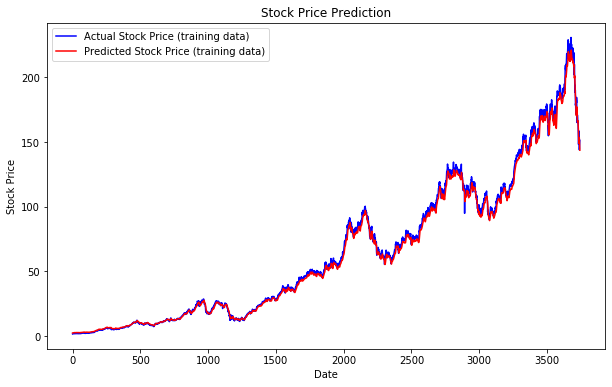

In [22]:
# check the model on training data first
prediction = model.predict(training_feature)

# convert back to original scale
prediction = scaler.inverse_transform(prediction)

# plot the training data and its prediction results
plt.figure(figsize=(10,6))
plt.plot(training_data[60:3803], color='blue', label='Actual Stock Price (training data)')
plt.plot(prediction , color='red', label='Predicted Stock Price (training data)')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [14]:
# prepare the rest 50 data point as the testing data
testing_feature = []
for i in range(3803, 3853):
  testing_feature.append(scaled_training_data[i-60:i,0])

testing_feature = np.array(testing_feature)
testing_feature = np.reshape(testing_feature, (testing_feature.shape[0], testing_feature.shape[1], 1))
print(testing_feature.shape)

(50, 60, 1)


In [0]:
# prediction of the testing data
predictions = model.predict(testing_feature)

# convert back to original scale
predictions = scaler.inverse_transform(predictions)

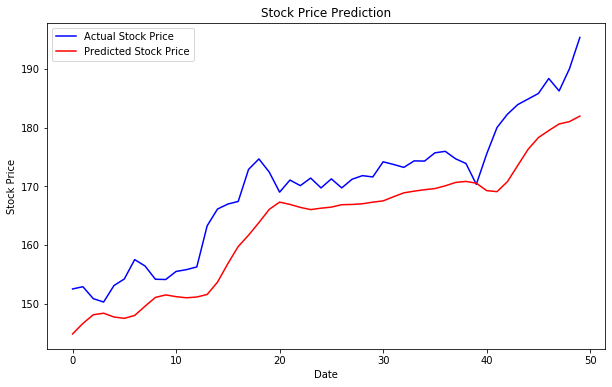

In [16]:
# plot the test data and the prediction
plt.figure(figsize=(10,6))
plt.plot(training_data[3803:3853], color='blue', label='Actual Stock Price')
plt.plot(predictions , color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()